In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u

#import seaborn as sns

#sns.set()

In [2]:
fits_image_filename = fits.open("/Users/matt/Desktop/DESI_Research/Intro_to_fits/gaia.fits")

hdul = fits_image_filename

In [3]:
hdul.info()

Filename: /Users/matt/Desktop/DESI_Research/Intro_to_fits/gaia.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   ()      
  1  votable       1 BinTableHDU     76   10000R x 13C   [K, D, D, D, D, D, D, E, E, 13A, E, E, E]   


In [4]:
data1 = hdul["votable"].data

cols = hdul["votable"].columns

In [5]:
cols

ColDefs(
    name = 'source_id'; format = 'K'
    name = 'ra'; format = 'D'; unit = 'deg'
    name = 'ra_error'; format = 'D'; unit = 'mas'
    name = 'dec'; format = 'D'; unit = 'deg'
    name = 'dec_error'; format = 'D'; unit = 'mas'
    name = 'parallax'; format = 'D'; unit = 'mas'
    name = 'parallax_error'; format = 'D'; unit = 'mas'
    name = 'phot_g_mean_mag'; format = 'E'; unit = 'mag'
    name = 'bp_rp'; format = 'E'; unit = 'mag'
    name = 'phot_variable_flag'; format = '13A'
    name = 'teff_val'; format = 'E'; unit = 'K'
    name = 'a_g_val'; format = 'E'; unit = 'mag'
    name = 'e_bp_min_rp_val'; format = 'E'; unit = 'mag'
)

In [6]:
fiber_data = Table(hdul["votable"].data)

fiber_data

source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,phot_g_mean_mag,bp_rp,phot_variable_flag,teff_val,a_g_val,e_bp_min_rp_val
int64,float64,float64,float64,float64,float64,float64,float32,float32,str13,float32,float32,float32
2084154943645178368,303.8680188923745,0.24322482860762504,47.714216196014746,0.27207668786529926,2.1167068860955345,0.27428574743574624,3.2522442,1.772346,NOT_AVAILABLE,4030.0,0.5965,0.281
1243381938292426624,207.36892124214552,0.23768685632620853,15.798077518779147,0.24970134522228465,14.27576828010514,0.3494063067378121,3.2923892,1.7271731,NOT_AVAILABLE,4070.0,0.499,0.2188
5199386085968258176,158.86627999476033,0.30330696382423733,-78.60774021002248,0.3188152232993099,8.704413483537778,0.32808950582299057,3.3200352,1.8044701,NOT_AVAILABLE,3943.3333,0.617,0.3315
6801963487910582144,312.95533423225476,0.28529465430067036,-26.9191433165702,0.21529931535742186,3.1380522673275815,0.37113102339349785,3.320498,1.8507895,NOT_AVAILABLE,3915.0,0.3813,0.197
5164707970261630080,53.22843060109699,0.3824336044821629,-9.458171515191356,0.21614371829047835,312.21914118452634,0.4673477267488773,3.3691404,1.1195965,NOT_AVAILABLE,4975.0,0.164,0.084
4081642115872415232,286.17111771108944,0.3065929389329533,-21.741747382690658,0.2798586728750117,24.30218454979094,0.36021167126345066,3.3701444,1.2072995,NOT_AVAILABLE,4744.0,0.203,0.0725
2965792913525711104,87.83145436356828,0.3422907447761226,-20.881881157917437,0.35877940742216197,29.97301993269585,0.29745830929099265,3.3802848,1.2576678,NOT_AVAILABLE,4681.5,0.3143,0.117
3305012316783145728,60.17004003226194,0.46197745936789575,12.49028993141921,0.37034148127247396,8.217464438972298,0.5324389429088189,3.387159,-0.0075821877,NOT_AVAILABLE,8336.0,0.3435,0.196
4529285391522200320,275.9254491025025,0.11055982680850622,21.76870525491716,0.18066656954033594,27.457853411040162,0.22582663363830507,3.3893392,1.3718264,NOT_AVAILABLE,4457.0,0.275,0.1315


In [7]:
RA = data1.field("ra") * u.degree
DEC = data1.field("dec") * u.degree

In [40]:
c = SkyCoord(ra = RA, dec= DEC, frame='icrs')

RA_rad = c.ra.wrap_at(180 * u.deg).radian
DEC_rad = c.dec.radian


In [41]:
inorth, = np.where(DEC_rad > 0.)

DEC_rad_north = DEC_rad[inorth]
RA_rad_north = RA_rad[inorth]

In [9]:
print("len ra_rad: ", len(RA_rad))
print("len dec_rad: ", len(DEC_rad))

len ra_rad:  10000
len dec_rad:  10000


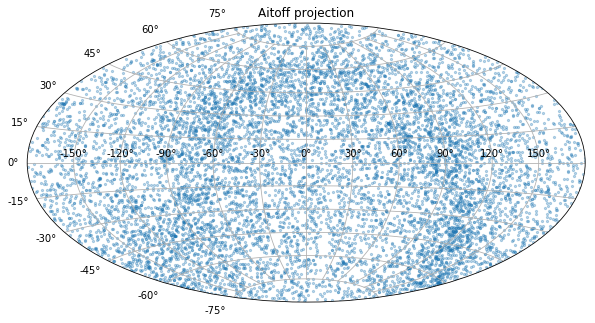

In [10]:
plt.figure(figsize=(10,8))
plt.subplot(111, projection="aitoff")
plt.title("Aitoff projection")
plt.grid(True)
plt.scatter(RA_rad, DEC_rad, s = 5.,  alpha=0.3)
plt.subplots_adjust(top=0.95,bottom=0.0)
plt.show()

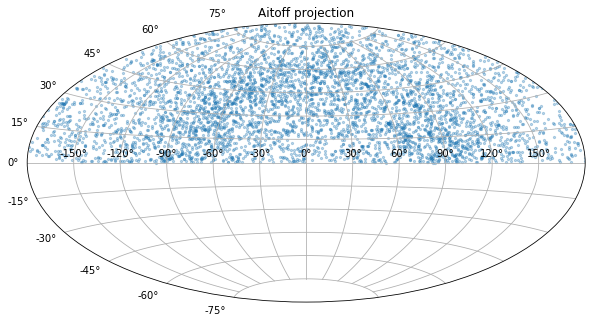

In [42]:
plt.figure(figsize=(10,8))
plt.subplot(111, projection="aitoff")
plt.title("Aitoff projection")
plt.grid(True)
plt.scatter(RA_rad_north, DEC_rad_north, s = 5.,  alpha=0.3)
plt.subplots_adjust(top=0.95,bottom=0.0)
plt.show()

In [30]:
sc = SkyCoord(RA, DEC, frame='icrs', unit='deg')

In [31]:
sc.galactic

<SkyCoord (Galactic): (l, b) in deg
    [( 83.66878278,   7.04555032), (355.81007229,  72.40149362),
     (296.28127978, -17.53256337), ..., (278.92745334, -23.21626116),
     (136.29649289, -20.37967907), (309.66505429, -30.62636884)]>

In [32]:
long = sc.galactic.l.wrap_at(180 * u.deg).radian
lat = sc.galactic.b.radian

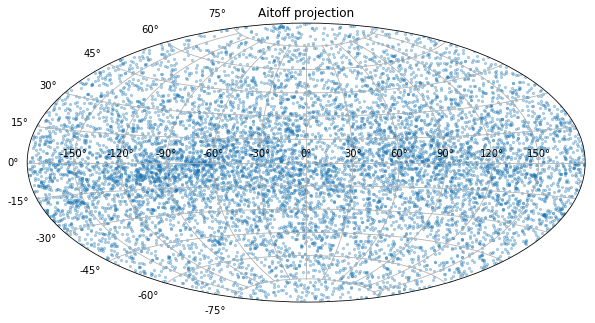

In [34]:
plt.figure(figsize=(10,8))
plt.subplot(111, projection="aitoff")
plt.title("Aitoff projection")
plt.grid(True)
plt.scatter(long, lat, s = 5., alpha=0.3)
plt.subplots_adjust(top=0.95,bottom=0.0)
plt.show()

In [17]:
print("len ra_rad: ", len(ra_rad))
print("len dec_rad: ", len(dec_rad))

len ra_rad:  10000
len dec_rad:  10000
